In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
%matplotlib inline
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [9]:
bos.head

<bound method NDFrame.head of            0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009 

In [7]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [10]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [13]:
df = pd.DataFrame(boston.data, columns=boston['feature_names'])

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston.target.shape

(506,)

In [16]:
boston.data.shape

(506, 13)

In [17]:
df['PRICE'] = boston.target

In [18]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
X = df.drop('PRICE',axis=1)
Y = df['PRICE']

In [20]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

In [22]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


Text(0.5,1,'Prices vs Predicted prices:')

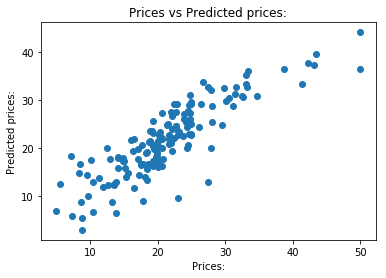

In [23]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,Y_train)

Y_pred = lin_model.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices:")
plt.title("Prices vs Predicted prices:")

In [24]:

Y_pred

array([14.73315874, 20.51886675, 23.23743673, 21.0438174 , 20.63311728,
       24.53605237, 29.51837839, 30.51001293, 29.23749697, 27.2382065 ,
       14.84214991, 13.69289464, 19.15582083, 15.85774866, 25.11125827,
       24.68210668, 29.20877497, 16.29680616, 20.3199164 , 20.84788148,
       27.66283096, 29.22181088, 25.4595483 , 12.27925965, 21.42523733,
       37.74515815, 13.97335104, 33.30327377,  6.5115209 , 27.5025882 ,
        2.89078667, 19.84039641, 22.68671379, 12.87664755, 27.2794629 ,
       44.13680455, 24.60217723,  8.61020565, 22.62497723, 16.65044351,
       26.63268306, 22.67015703, 19.9084818 , 20.03469246, 30.85081086,
       28.73124548,  6.56981011,  6.78208757, 19.03301983, 35.30377014,
       11.62735947, 32.72529449, 18.06126141, 23.08297522, 21.66588447,
       33.74422739, 22.05547981,  8.7441366 , 15.54642473, 28.9633889 ,
       12.37272262, 27.5593051 , 16.56263872, 32.15642469, 12.85658241,
       20.13962996, 30.58901457, 15.77557395,  5.79429478, 22.73

In [25]:
accuracy = lin_model.score(X_test,Y_test) * 100
print(str(accuracy) + '%')

73.5685484742136%


In [26]:

mean_sq_error = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mean_sq_error)

16.865761754351286
